In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df1 = pd.read_csv('data/covid19-google.csv')
df2 = pd.read_csv('data/covid19-CAN.csv')

In [79]:
# location key of Toronto 'CA_ON_3595'
df_GOO = df1[df1['location_key'].apply(lambda k: k == 'CA_ON_3595' if isinstance(k, str) else False)]
df_GOO['date'] = pd.to_datetime(df_GOO['date'])
df_GOO = df_GOO.set_index('date')
df_GOO.tail()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_7120\3220163781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GOO['date'] = pd.to_datetime(df_GOO['date'])


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
date,,,,,,,,,
2022-01-31,CA_ON_3595,1957.0,57.0,NaN,NaN,276846.0,4066.0,NaN,NaN
2022-02-01,CA_ON_3595,627.0,3.0,NaN,NaN,277473.0,4069.0,NaN,NaN
2022-02-02,CA_ON_3595,746.0,16.0,NaN,NaN,278219.0,4085.0,NaN,NaN
2022-02-03,CA_ON_3595,716.0,15.0,NaN,NaN,278935.0,4100.0,NaN,NaN
2022-02-04,CA_ON_3595,489.0,7.0,NaN,NaN,279424.0,4107.0,NaN,NaN


**COVID19-download**
- numTest

In [80]:
df_CA = df2[df2['prname'] == 'Ontario']
df_CA['date'] = pd.to_datetime(df_CA['date'])
df_CA = df_CA.set_index('date')
df_CA.head()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_7120\2147613715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['date'] = pd.to_datetime(df_CA['date'])


,pruid,prname,prnameFR,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,35,Ontario,Ontario,NaN,3,0.0,0.0,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-08,35,Ontario,Ontario,NaN,3,0.0,0.0,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-16,35,Ontario,Ontario,NaN,3,0.0,0.0,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-21,35,Ontario,Ontario,NaN,3,0.0,0.0,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-24,35,Ontario,Ontario,NaN,4,0.0,0.0,4,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


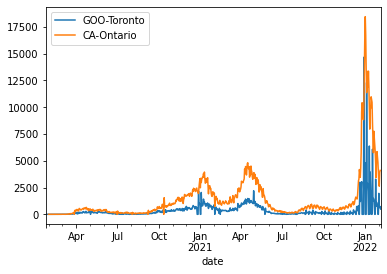

In [81]:
# Compare GOO and 
ax = df_GOO['new_confirmed'].plot(x='date', label='GOO-Toronto')
df_CA['numtoday'].plot(x='date', label='CA-Ontario', ax=ax)

plt.legend()

In [ ]:
parsed_date = pd.to_datetime(df_ww['sampleID'].apply(lambda d: d.split('_')[1])).rename('date')
df_ww = pd.concat([parsed_date, df_ww[['uWWMeasureID', 'value']]], axis=1)

In [ ]:
# test example on Ontario WW
df_ww_ON = df_ww[df_ww['uWWMeasureID'].apply(lambda x: x.endswith('TAB'))]
df_ww_ON.head(2)

In [ ]:
# test example on Ontario mobility
df_ON = df_mob[df_mob['location_key'].apply(lambda x: x.startswith('CA_ON') if isinstance(x, str) else False)]
df_ON.head(2)

In [ ]:
df_ON.loc[:, 'date'] = pd.to_datetime(df_ON['date'], infer_datetime_format=True)

In [ ]:
df_merge = pd.merge(df_ON, df_ww_ON, how='outer', on='date').set_index('date')
df_merge.head(10)

In [ ]:
tmp = df_merge[df_merge['uWWMeasureID'].apply(lambda i: i.endswith('N1TAB') if isinstance(i, str) else False)]
tmp['value'].plot()
tmp['mobility_transit_stations'].plot()